In [22]:
import pandas as pd
import numpy as np

csv_path = 'zestawy danych/admission/Admission_Predict.csv'
data = pd.read_csv(csv_path)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
data.drop('Serial No.', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [24]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4752D8B38>,
      dtype=object)

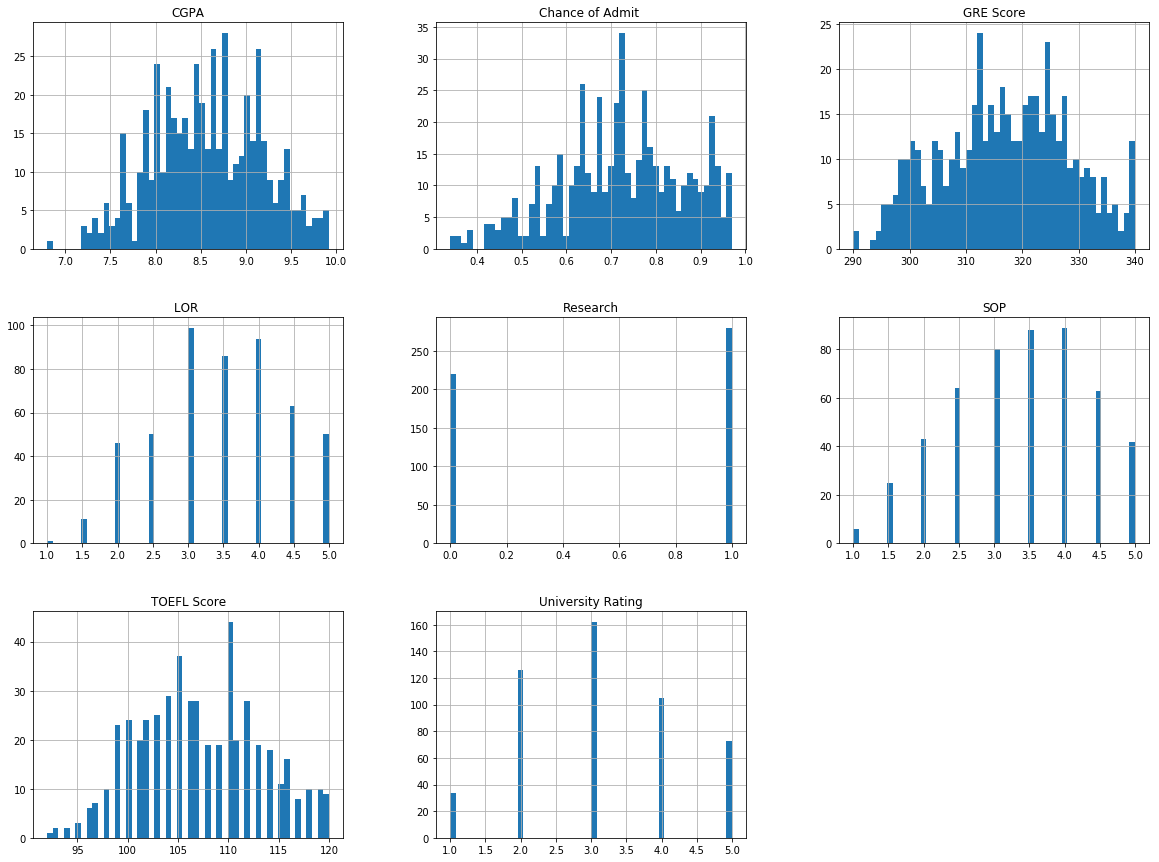

In [25]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [27]:
data = train_set.copy()
corr_matrix = data.corr()
corr_matrix['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.878106
GRE Score            0.820509
TOEFL Score          0.789258
SOP                  0.680343
University Rating    0.679056
LOR                  0.626950
Research             0.544058
Name: Chance of Admit , dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4765D7F28>,
      dtype=object)

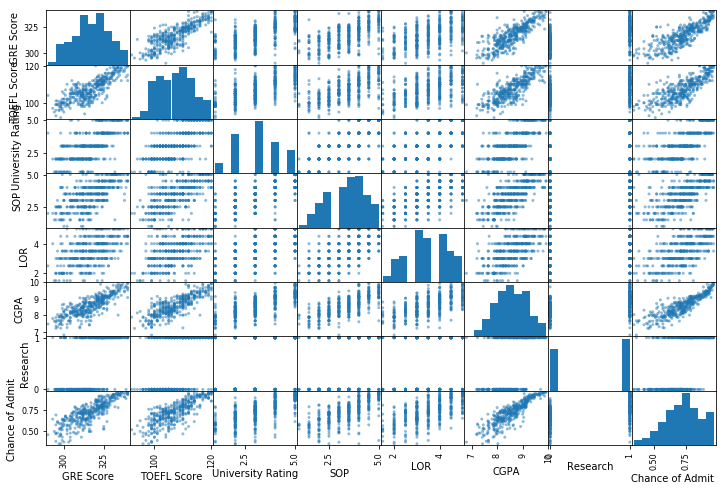

In [28]:
from pandas.plotting import  scatter_matrix
scatter_matrix(data, figsize=(12,8))

In [29]:
data = train_set.drop('Chance of Admit ', axis=1)
data_labels = train_set['Chance of Admit '].copy()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
data_tr = pipeline.fit_transform(data.values)

In [31]:
data_tr.shape

(400, 7)

In [32]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(data_tr, data_labels)
predictions = lin_reg.predict(data_tr)
lin_mse = mean_squared_error(data_labels, predictions)
print(np.sqrt(lin_mse))
lin_scores = cross_val_score(lin_reg, data_tr, data_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

0.05938480848210052
Scores:  [0.04981871 0.06481945 0.06934041 0.06455844 0.05446401 0.06664611
 0.06442842 0.06261526 0.05205124 0.05016745]
Mean:  0.059890949662881256
Standard deviation:  0.007042155694291399


In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_tr, data_labels)
predictions = tree_reg.predict(data_tr)
tree_mse = mean_squared_error(data_labels, predictions)
print(np.sqrt(tree_mse))
tree_scores = cross_val_score(tree_reg, data_tr, data_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse = np.sqrt(-tree_scores)
display_scores(tree_rmse)

1.6653345369377347e-17
Scores:  [0.08354639 0.09981232 0.09195107 0.06367888 0.07067531 0.09245269
 0.09642354 0.08235593 0.10747093 0.07742739]
Mean:  0.08657944698719719
Standard deviation:  0.012884073866254927


In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_tr, data_labels)
predictions = forest_reg.predict(data_tr)
forest_mse = mean_squared_error(data_labels, predictions)
print(np.sqrt(forest_mse))
forest_scores = cross_val_score(forest_reg, data_tr, data_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-forest_scores)
display_scores(forest_rmse)

0.02886598344072136
Scores:  [0.06246179 0.07080837 0.08713165 0.0691764  0.06378989 0.06902826
 0.07505481 0.06219224 0.06115063 0.06459141]
Mean:  0.06853854565984523
Standard deviation:  0.007509178306133743


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
final_model = lin_reg

X_test = test_set.drop('Chance of Admit ', axis=1)
y_test = test_set['Chance of Admit '].copy()

X_test_tr = pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_tr)

final_mse = mean_squared_error(y_test, final_predictions)
np.sqrt(final_mse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.06086588041578311